# Patient Survival Prediction


### Presentation du projet : https://www.kaggle.com/datasets/mitishaagarwal/patient

In [1]:
#importation des packagins : 

import pandas as pd
import numpy as np 


#importation des packaging de visualisation : 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importation des outils statistiques :
from scipy.stats import chi2_contingency as khi2

#importation des packaging de preprocessing : 
from sklearn.preprocessing import OrdinalEncoder

#importation des packaging de pour la selection du meilleur model :
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#importation des models de Classification : 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#importation des packagins pour de la feature selection : 
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline


#importation des metrics : 
from sklearn.metrics import accuracy_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

# Démarche à suivre : 

- 1. Prise de connaissance de notre BDD : 
    - Description des colonnes 
    - Nombre de features ?
    - Type de features ? 
        - continue, discrete, ordinale, nominale ?
    - type de la target (continue/discrete) ?
    - Données manquantes ?
        - vrai NaN ou information sur l'absence d'un element d'une colonne ?
- 2. Analyse univariée (Imputing ou nettoyage des NaN) :
    - variables categoriques : countplot et remplacement par le mode
    - variables numeriques : boxplot et remplacement par la moyenne (ou mediane si trop d'outliers)
- 3. Analyse bi-variée (target vs features) : 
    - Si categorique vs continue : boxplot **ANOVA**
    - Si variable categorique vs categorique : **Khi2**
    - Si variable continue vs continue : **corrélation**

- 4. Encodage des données:
    - variable categorique  = variables ordinale, nominale et discrete :
        - on encode les variables nominales et ordinales (discrète sont déjà "encoder" car ce sont des valeurs numériques)
- 5. Normalisation des données: 
    - si on fait de la selection de modèle avec le train_test_split : 
        - On normalise avec la moyenne et std du **train**

- 6. Réitérer les étapes **2, 4 et 5** pour le fichier **test** (s'il y en a un)


#### 7. Sauvegarde et exportation des données nettoyées dans un fichier train et test nettoyés

### Creation de n_notebook ou chacun d'entre eux prendront un modèle différent

- 1. Création du modèle 
- 2. Mesure de la performence du modèle 
- 3. Amélioration du modèle
    - select features, gridsearch, ..
- 4. mesure performence du modèle
- 5. si compétition kaggle: 
    - Créer dataframe avec l'Id de la ligne en index et la valeur prédite du modèle en colonne.   

# 1. Prise de connaissance de la Base de Données :
### Description des colonnes  : https://www.kaggle.com/datasets/mitishaagarwal/patient


Après lecture du descriptif de chaque colonne, il n'y a pas de NaN signifiant l'absence d'information. Ici le **NaN** correspond à **une donnée manquante**.

In [2]:
patient = pd.read_csv('dataset.csv')
df = patient.copy()

In [3]:
#affichage de l'ensemble des colonnes : 
pd.set_option('display.max_columns', None)

In [4]:
patient.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


- encounter_id = Identifiant unique associé au séjour d'un patient

In [5]:
#La target correspond a la survie du patient :
target = patient.hospital_death

In [6]:
data_null = round((patient.isnull().sum()/patient.shape[0])*100,2).sort_values(ascending=False)
#data_null contient le % de données manquantes pour chaque colonnes

In [7]:
#affichons les données manquantes : 
for i in data_null.index:
    print(f"{i:-<40}{data_null[i]} %")

Unnamed: 83-----------------------------100.0 %
d1_potassium_max------------------------10.45 %
d1_potassium_min------------------------10.45 %
h1_mbp_noninvasive_min------------------9.9 %
h1_mbp_noninvasive_max------------------9.9 %
apache_4a_hospital_death_prob-----------8.67 %
apache_4a_icu_death_prob----------------8.67 %
h1_diasbp_noninvasive_min---------------8.01 %
h1_diasbp_noninvasive_max---------------8.01 %
h1_sysbp_noninvasive_min----------------8.0 %
h1_sysbp_noninvasive_max----------------8.0 %
d1_glucose_min--------------------------6.33 %
d1_glucose_max--------------------------6.33 %
h1_mbp_max------------------------------5.06 %
h1_mbp_min------------------------------5.06 %
h1_resprate_min-------------------------4.75 %
h1_resprate_max-------------------------4.75 %
age-------------------------------------4.61 %
h1_spo2_min-----------------------------4.56 %
h1_spo2_max-----------------------------4.56 %
temp_apache-----------------------------4.48 %
h1_diasbp_min-

#### Conclusion : 
- Nous allons supprimer la colonne Unnamed: 83
- remplacer par la moyenne/mediane les variables numeriques
- remplacer par le mode les variables categoriques

In [8]:
df = df.drop('Unnamed: 83', axis = 1)

### Separation des features en 2:  variables categoriques/ variables numériques

In [9]:
for i in df:
    if df[i].nunique() < 30:
        print(f"{i:-<30} : {df[i].unique()}")

elective_surgery-------------- : [0 1]
ethnicity--------------------- : ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']
gender------------------------ : ['M' 'F' nan]
icu_admit_source-------------- : ['Floor' 'Accident & Emergency' 'Operating Room / Recovery'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type----------------- : ['admit' 'readmit' 'transfer']
icu_type---------------------- : ['CTICU' 'Med-Surg ICU' 'CCU-CTICU' 'Neuro ICU' 'MICU' 'SICU'
 'Cardiac ICU' 'CSICU']
apache_post_operative--------- : [0 1]
arf_apache-------------------- : [ 0.  1. nan]
gcs_eyes_apache--------------- : [ 3.  1.  4. nan  2.]
gcs_motor_apache-------------- : [ 6.  3. nan  4.  5.  1.  2.]
gcs_unable_apache------------- : [ 0. nan  1.]
gcs_verbal_apache------------- : [ 4.  1.  5. nan  3.  2.]
intubated_apache-------------- : [ 0.  1. nan]
ventilated_apache------------- : [ 0.  1. nan]
aids-------------------------- : [ 0. nan  1.]
cirrhosis-------------------

In [10]:
for i in df:
    if df[i].nunique() > 30:
        print(i, df[i].unique()[:10],"\n")

encounter_id [ 66154 114252 119783  79267  92056  33181  82208 120995  80471  42871] 

patient_id [25312 59342 50777 46918 34377 74489 49526 50129 10577 90749] 

hospital_id [118  81  33  83  77 149  31 151  69  46] 

age [68. 77. 25. 81. 19. 67. 59. 70. 45. 50.] 

bmi [22.73       27.42       31.95       22.64               nan 27.56
 57.45       25.71       28.25705249 27.3828125 ] 

height [180.3 160.  172.7 165.1 188.  190.5 165.  170.2 175.3 154.9] 

icu_id [ 92  90  93  91  95 114 113 102  97 100] 

pre_icu_los_days [5.41666667e-01 9.27777778e-01 6.94444000e-04 7.36111110e-02
 2.08333300e-03 9.02777800e-03 6.04166670e-02 4.86111100e-03
 1.27152778e+00 2.08333330e-02] 

weight [ 73.9  70.2  95.3  61.7   nan 100.  156.6  79.   67.8  70.1] 

apache_2_diagnosis [113. 108. 122. 203. 119. 301. 116. 112. 303. 218.] 

apache_3j_diagnosis [ 502.01  203.01  703.03 1206.03  601.01  403.01  501.05  103.01  107.01
 1304.08] 

heart_rate_apache [118. 120. 102. 114.  60. 113. 133.  82.  94. 101

### Conclusion : 

- On voit clairement que les variables prenant moins de 30 valeurs différentes sont de type categoriques
- Donc variable.nunique <30 = **variables categoriques**  (ordinal/nominale + discretes)
- variable.nunique > 30 = **variables numeriques**

In [11]:
### Creation des variables contenant les données numériques et categoriques: 
var_cat = []
var_num = []
for i in df:
    if df[i].nunique() > 30:
        var_num.append(i)
    else:
        var_cat.append(i)

Maintenant que nous avons isoler chaque type de colonne, nous allons pouvoir faire l'imputing en fonction du type de données :

# 2. Analyse univariée 

## 2.1 Variable categoriques : 

In [12]:
len(var_cat)
#scindons le dataframe pour pouvoir afficher des figure ayant plus de clarté :

25

In [13]:
df_cat1 = df[var_cat].iloc[:,:12]
df_cat2 = df[var_cat].iloc[:,12:]

In [14]:
len(df_cat1.columns)

12

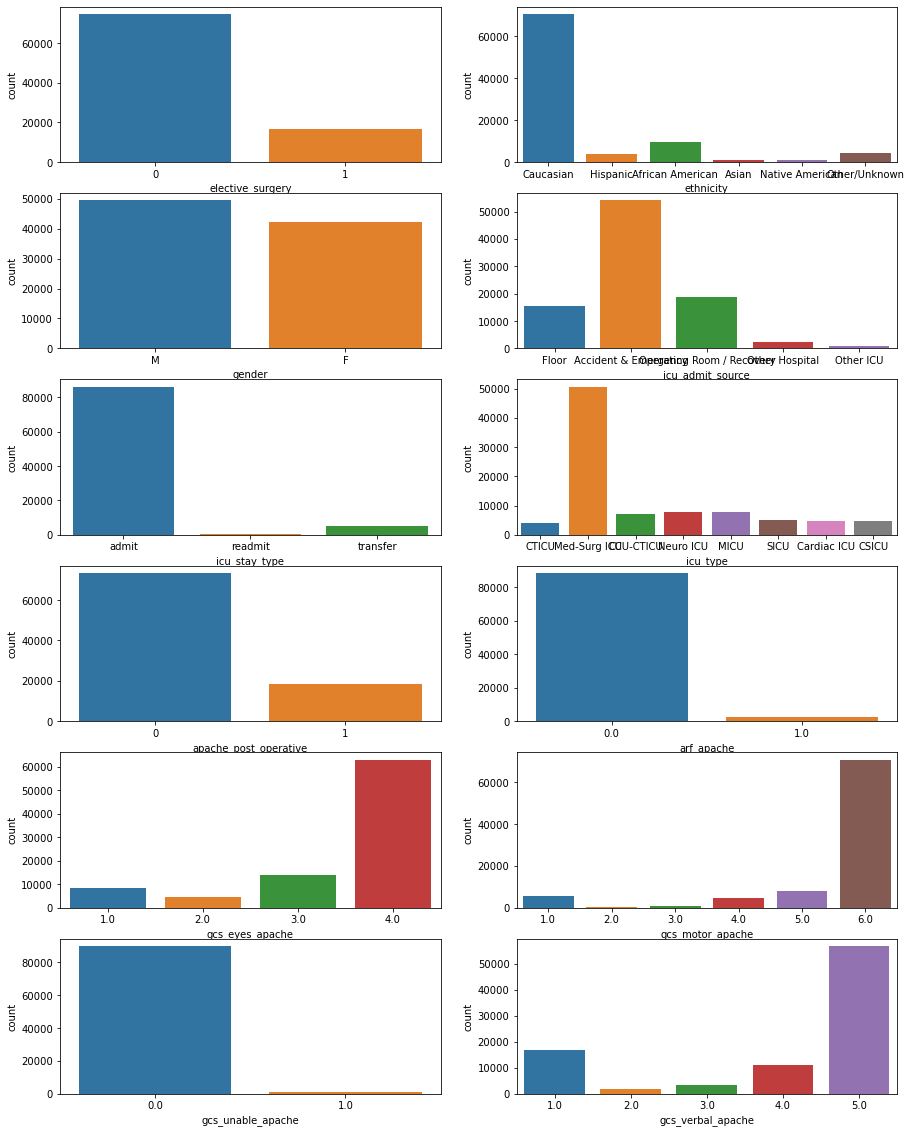

In [15]:
fig, axe = plt.subplots(6,2, figsize=(15,20))
for i in range(len(df_cat1.columns)):
    nrow = i//2
    ncol = i%2
    ax = sns.countplot(x = df_cat1.columns[i], ax = axe[nrow,ncol],
                       data = df_cat1)

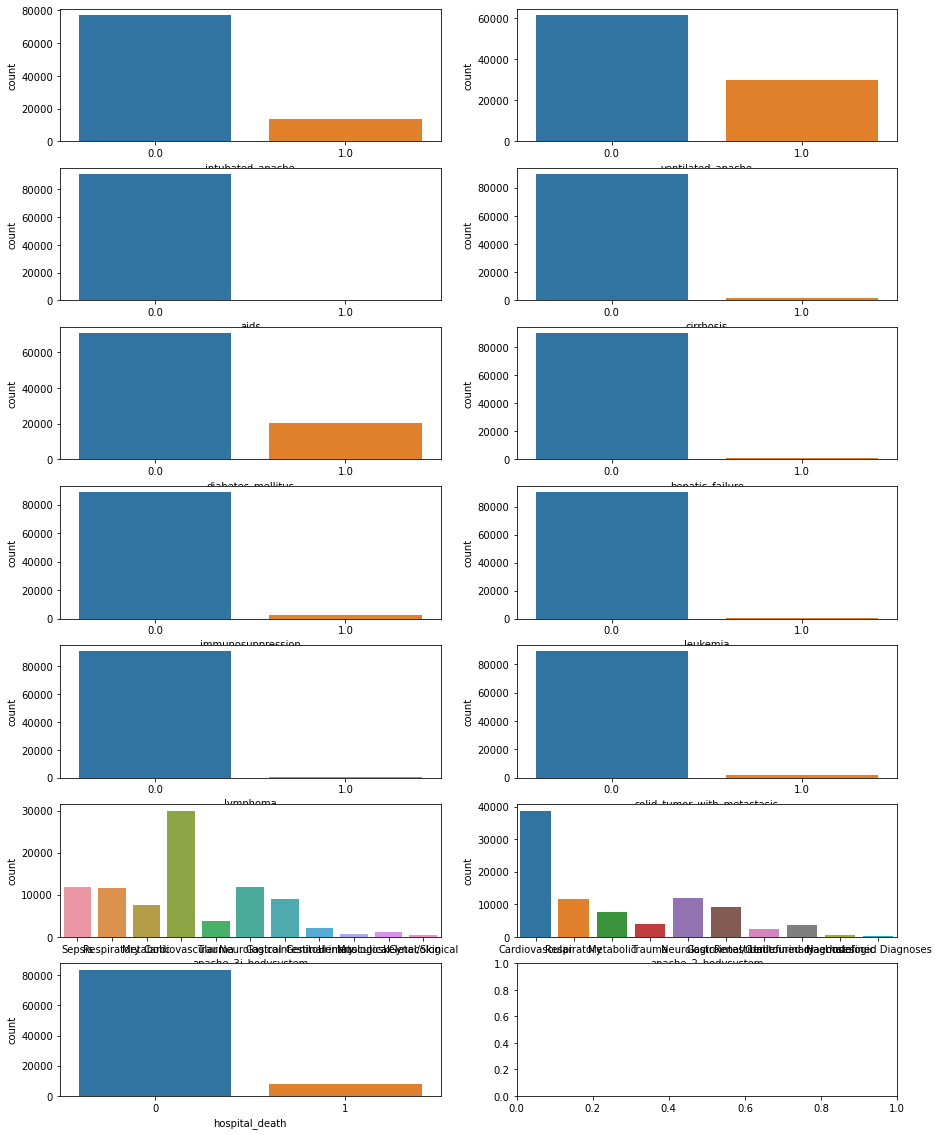

In [16]:
fig, axe = plt.subplots(7,2, figsize=(15,20))
for i in range(len(df_cat2.columns)):
    nrow = i//2
    ncol = i%2
    ax = sns.countplot(x = df_cat2.columns[i], ax = axe[nrow,ncol],
                       data = df_cat2)

# Remplacement des NaN par le mode : 

In [17]:
for i in df_cat1.columns:
    mode = df[i].value_counts().idxmax()
    df[i] = df[i].fillna(mode)

In [18]:
for i in df_cat2.columns:
    mode = df[i].value_counts().idxmax()
    df[i] = df[i].fillna(mode)

## 2.2 Variable numériques :

In [19]:
len(var_num)
#au vu du nombre on va scinder le tableaux en 4

59

In [20]:
df_num1 = df[var_num].iloc[:,:15]
df_num2 = df[var_num].iloc[:,15:30]
df_num3 = df[var_num].iloc[:,30:45]
df_num4 = df[var_num].iloc[:,45:]

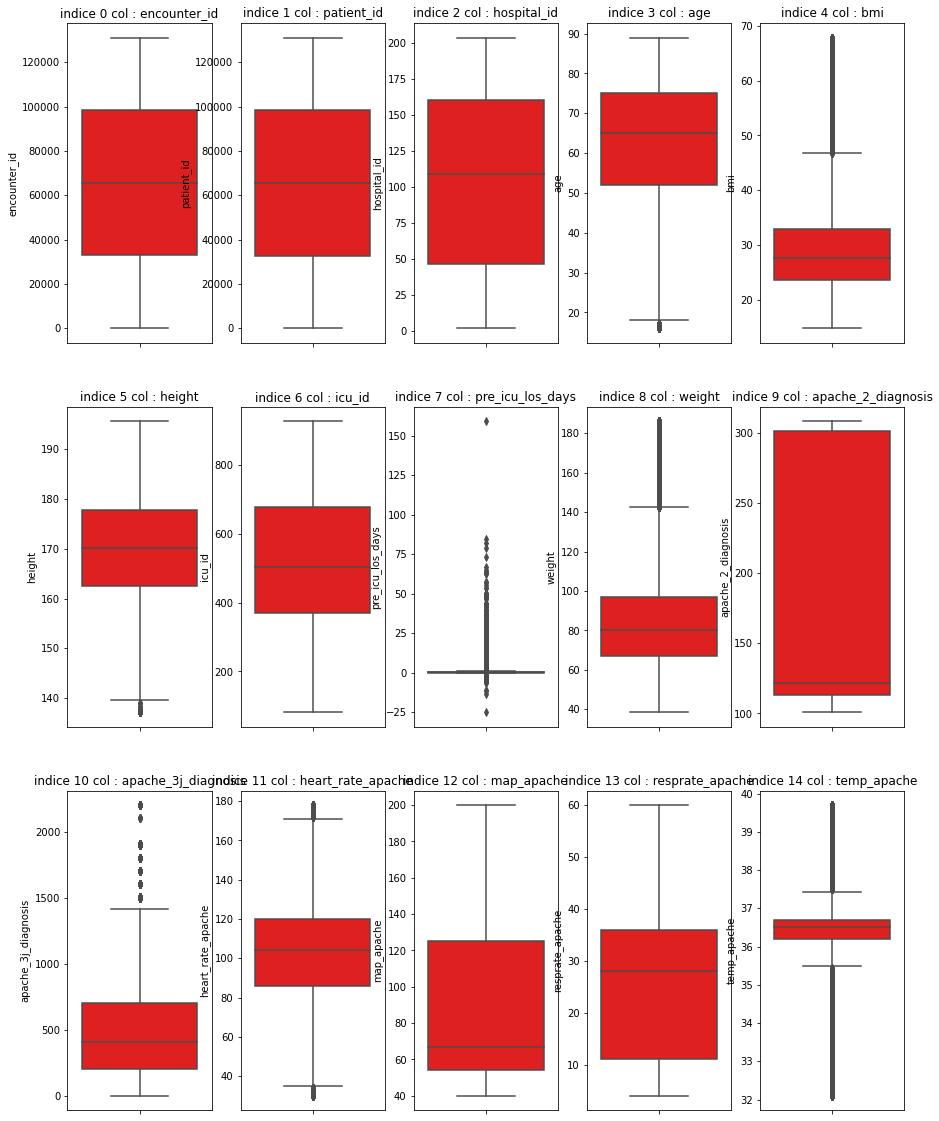

In [21]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num1.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(y = df_num1.columns[i], ax = axe[nrow,ncol], color = "red",
                       data = df_num1)
    ax.set_title(f"indice {i} col : {df_num1.columns[i]}")

**Observations :**
- Remplacement par la **médiane** pour les colonnes d'indices : **4, 7, 8, 10, 14**
- La moyenne pour le reste

In [22]:
for i in df_num1.columns:
    if i in [4, 7, 8, 10, 14]:
        median = df[i].median()
        df[i] = df[i].fillna(median)
    else:
        moyenne = df[i].mean()
        df[i] = df[i].fillna(moyenne)

In [23]:
#Verification du remplacement : 
df[df_num1.columns].isnull().sum().sum()

0

Appliquons le même raisonnement pour les colonnes restantes : 

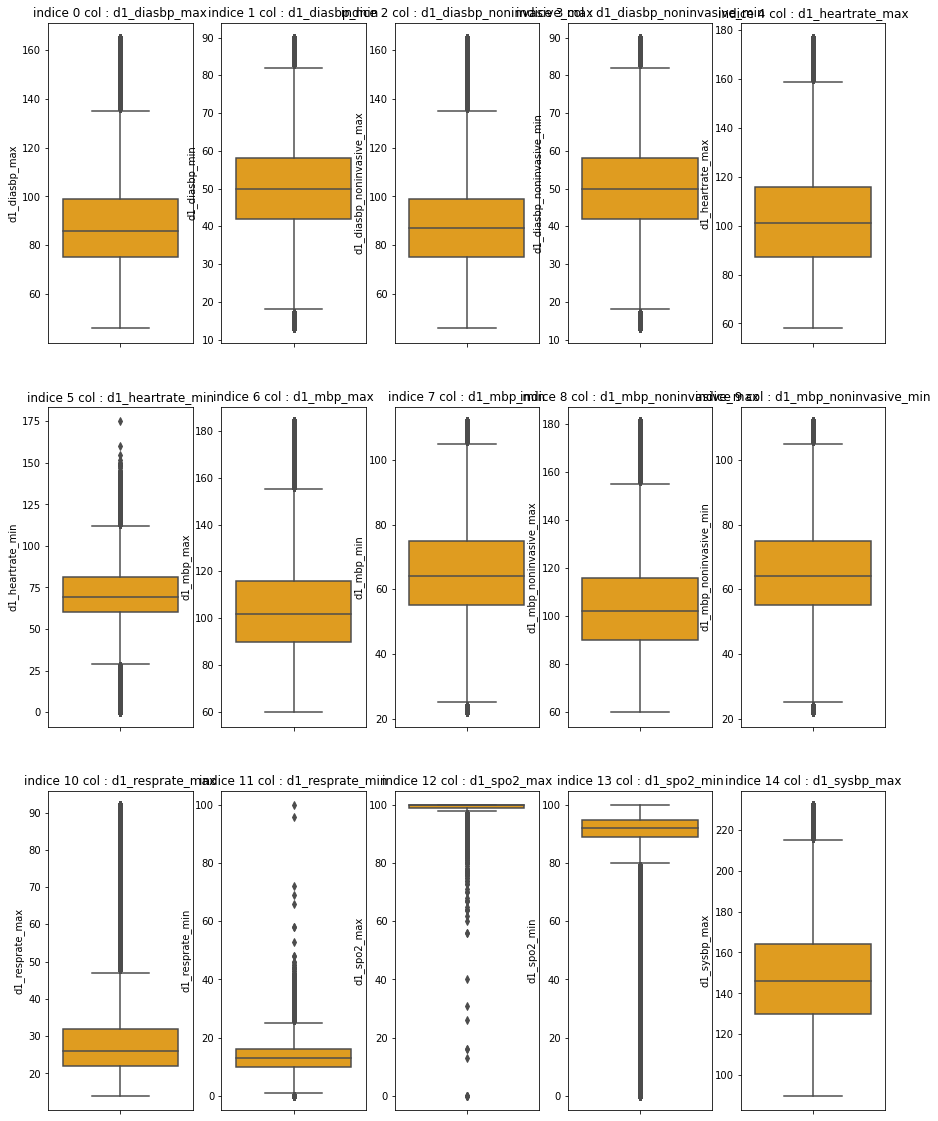

In [24]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num2.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(y = df_num2.columns[i], ax = axe[nrow,ncol], color = "orange",
                       data = df_num2)
    ax.set_title(f"indice {i} col : {df_num2.columns[i]}")

**Observations :**

Remplacement par la **médiane** pour : **toutes les colonnes**

In [25]:
for i in df_num2.columns:
    median = df[i].median()
    df[i] = df[i].fillna(median)
    

In [26]:
df[df_num2.columns].isnull().sum().sum()

0

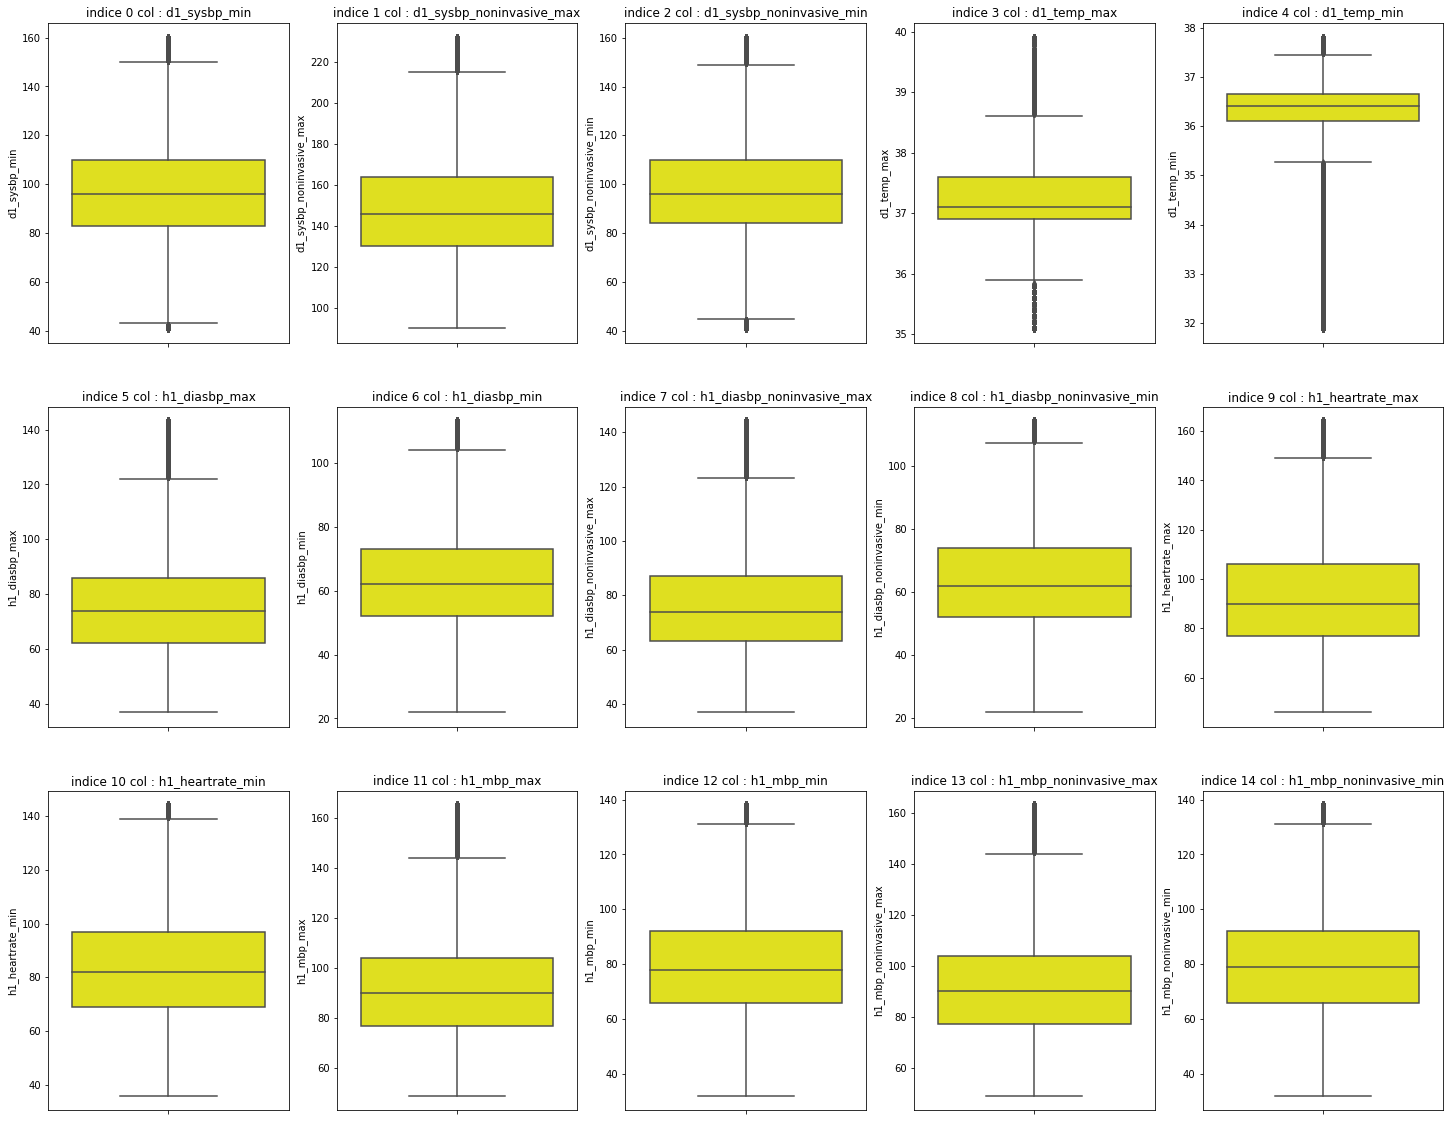

In [27]:
fig, axe = plt.subplots(3,5, figsize=(25,20))
for i in range(len(df_num3.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(y = df_num3.columns[i], ax = axe[nrow,ncol], color = "yellow",
                       data = df_num3)
    ax.set_title(df_num3.columns[i])
    ax.set_title(f"indice {i} col : {df_num3.columns[i]}")

**Observations :**

Remplacement par la **médiane** pour : **toutes les colonnes**

In [28]:
for i in df_num3.columns:
    median = df[i].median()
    df[i] = df[i].fillna(median)
    

In [29]:
df[df_num2.columns].isnull().sum().sum()

0

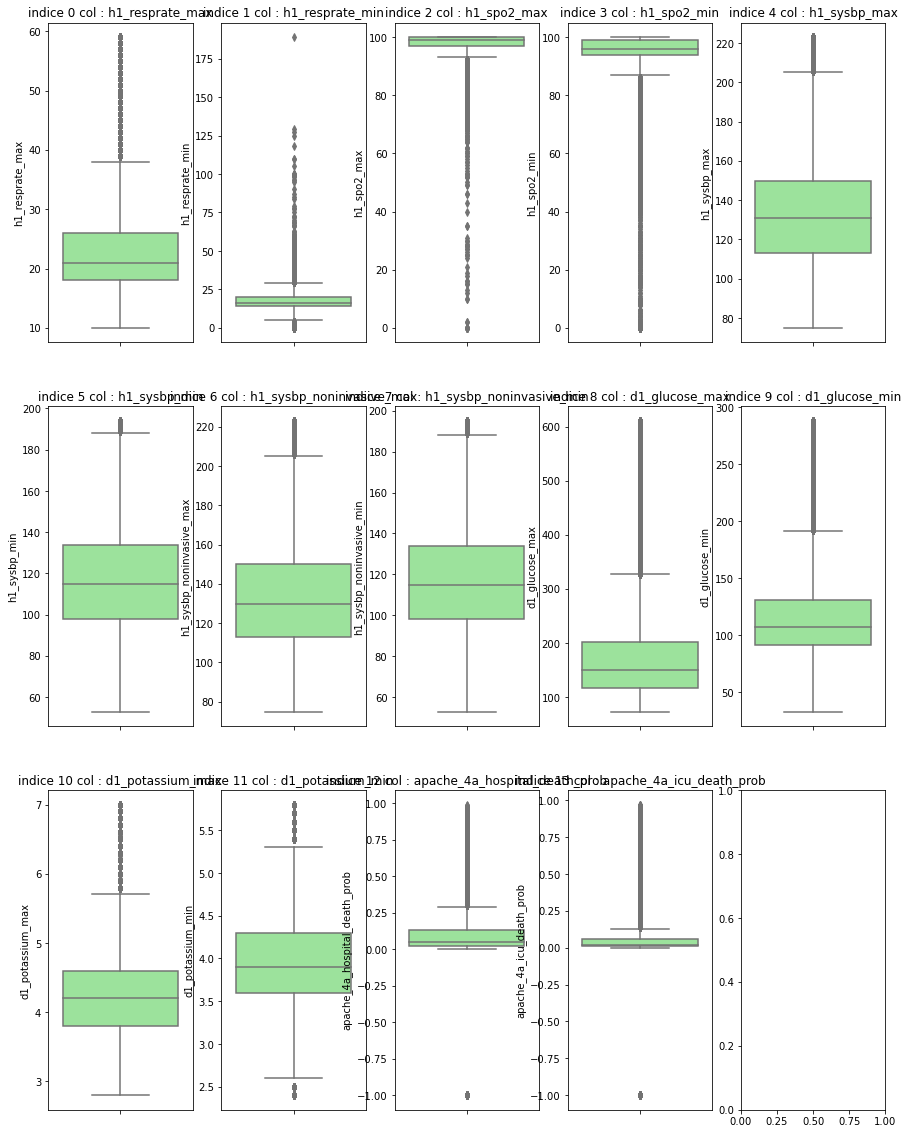

In [30]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num4.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(y = df_num4.columns[i], ax = axe[nrow,ncol], color = "lightgreen",
                       data = df_num4)
    ax.set_title(df_num4.columns[i])
    ax.set_title(f"indice {i} col : {df_num4.columns[i]}")

**Observations :**

Remplacement par la **médiane** pour : **toutes les colonnes**

In [31]:
for i in df_num4.columns:
    median = df[i].median()
    df[i] = df[i].fillna(median)

In [32]:
df[df_num2.columns].isnull().sum().sum()

0

Verifions que sur notre dataframe il n'y a plus aucun NaN : 

In [33]:
df.isnull().sum().sum()

0

# 3. Analyse bi-variée (target vs features) :
## 3.1 variable categorique vs continue : boxplot


Nous allons reprendre le même code qui nous a permis de faire l'imputing sur nos variables continues, et y ajouter la target : 

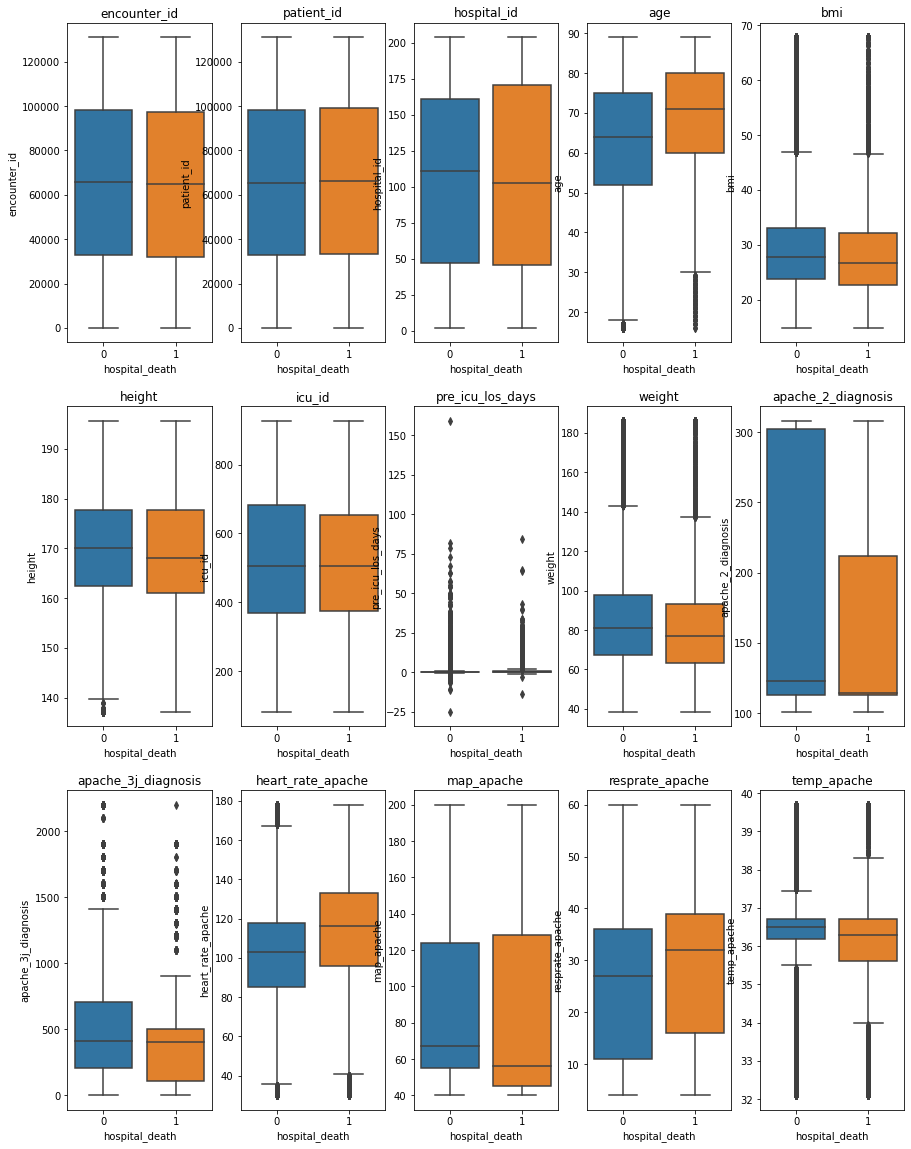

In [34]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num1.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(x = target, y = df_num1.columns[i], ax = axe[nrow,ncol], 
                       data = df_num1)
    ax.set_title(df_num1.columns[i])
plt.show()

**Observations**:
- La mediane **ne varie pas** en fonction de la target pour les features : **encounter_id, patient_id, hospital_id, icu_id, pre_icu_los_days, temp_apache**
    - donc on **accepte l'hypothèse H0** (indépendance des variables)
- La mediane **varie** en fonction de la target  les autres features.
    - on **accepte l'hypothèse H1** (dépendance des variables)

**Conclusion** :
- On **supprime** les variables : **encounter_id, patient_id, hospital_id, icu_id, pre_icu_los_days, temp_apache**

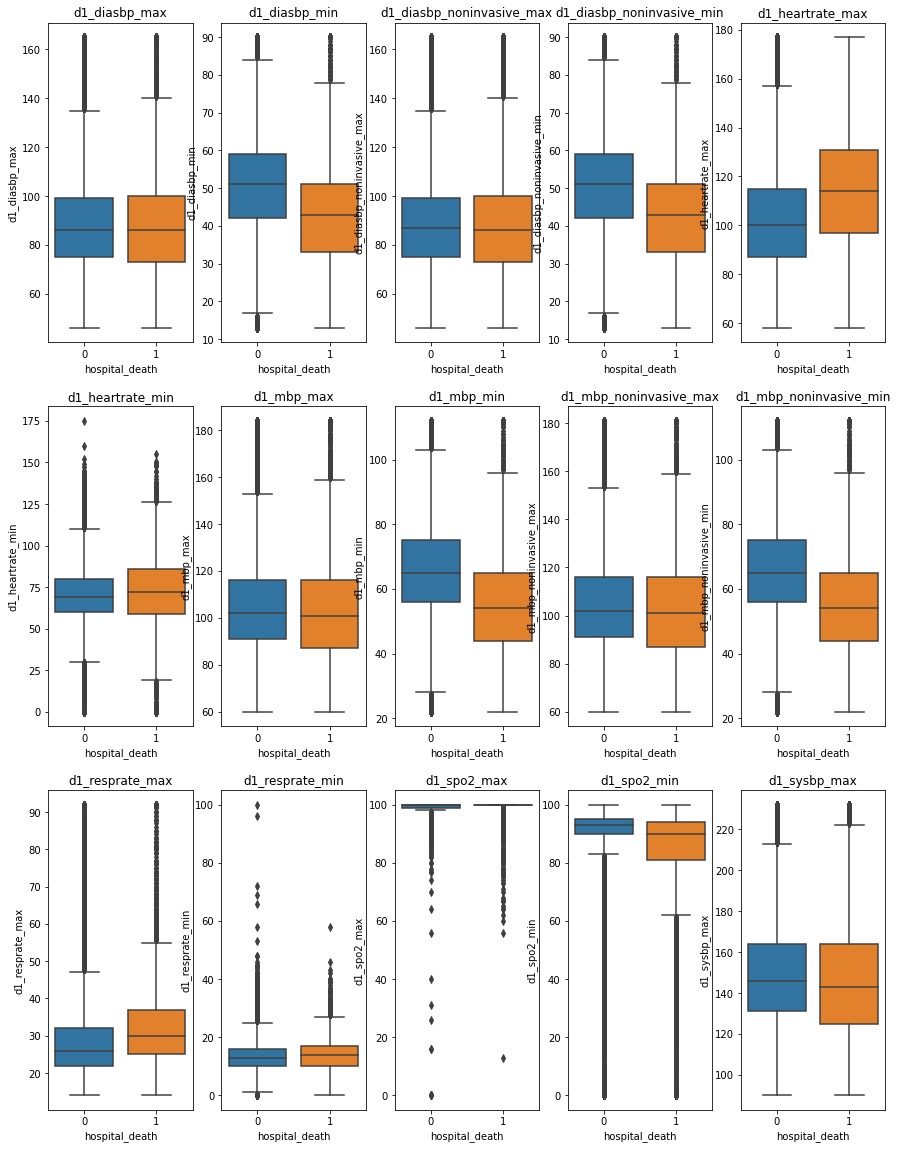

In [35]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num2.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(x = target, y = df_num2.columns[i], ax = axe[nrow,ncol], 
                       data = df_num2)
    ax.set_title(df_num2.columns[i])
plt.show()

**Observations**:
- La mediane **ne varie pas** en fonction de la target pour les features : **d1_diasbp_max, d1_diasbp_noninvasive_max, d1_heartrate_min, d1_mbp_max, d1_mbp_noninvasive_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_max**
    - donc On **accepte l'hypothèse H0** (indépendance des variables)
- La mediane **varie** en fonction de la target  les autres features.
    - On **accepte l'hypothèse H1** (dépendance des variables)

**Conclusion** :

- On **supprime** les variables : **d1_diasbp_max, d1_diasbp_noninvasive_max, d1_heartrate_min, d1_mbp_max, d1_mbp_noninvasive_max, d1_resprate_min, d1_spo2_max, d1_spo2_min, d1_sysbp_max**

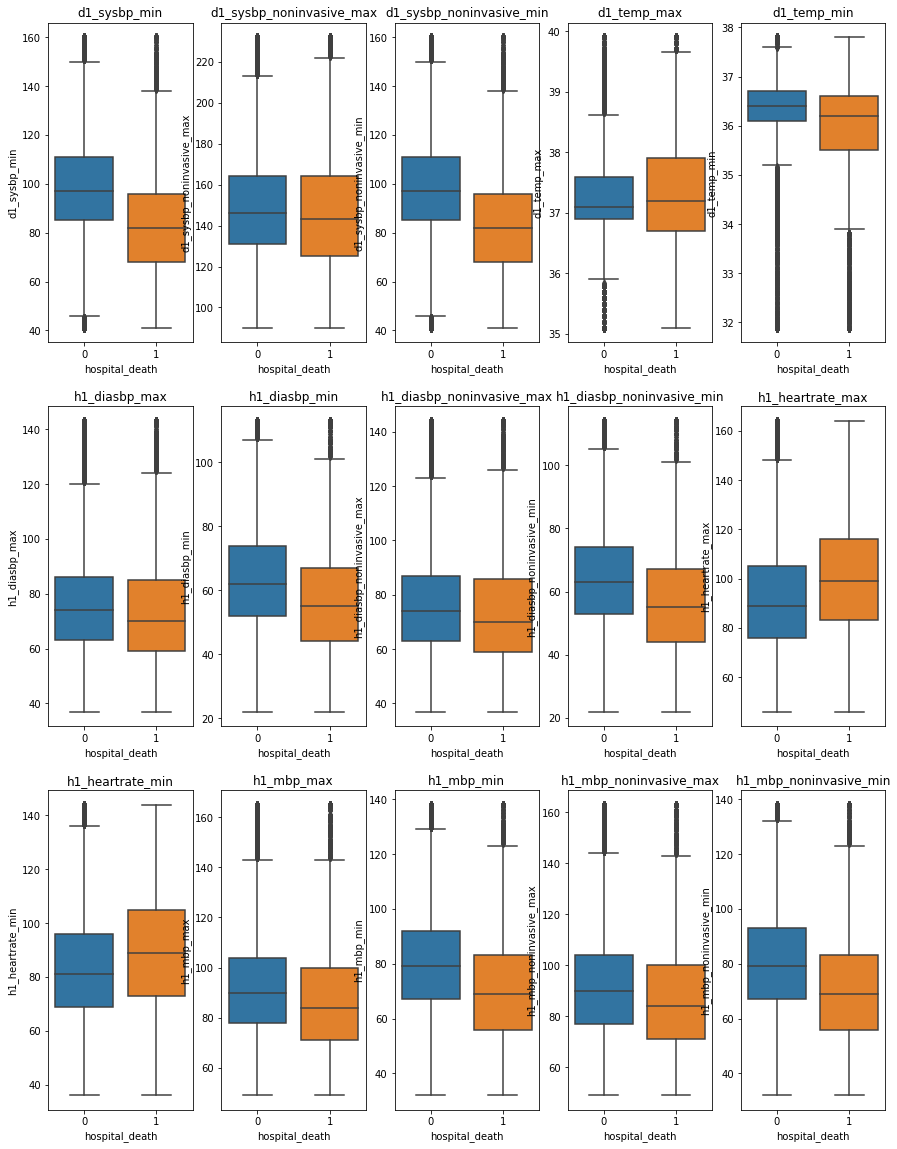

In [36]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num3.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(x = target, y = df_num3.columns[i], ax = axe[nrow,ncol], 
                       data = df_num3)
    ax.set_title(df_num3.columns[i])
plt.show()

**Observations**:
- La mediane **ne varie pas** en fonction de la target pour les features : **d1_sysbp_noninvasive_max, d1_temp_max, , d1_temp_min**
    - donc On **accepte l'hypothèse H0** (indépendance des variables)
- La mediane **varie** en fonction de la target  les autres features.
    - On **accepte l'hypothèse H1** (dépendance des variables)

**Conclusion** :
- On **supprime les variables** : **d1_sysbp_noninvasive_max, d1_temp_max, , d1_temp_min**

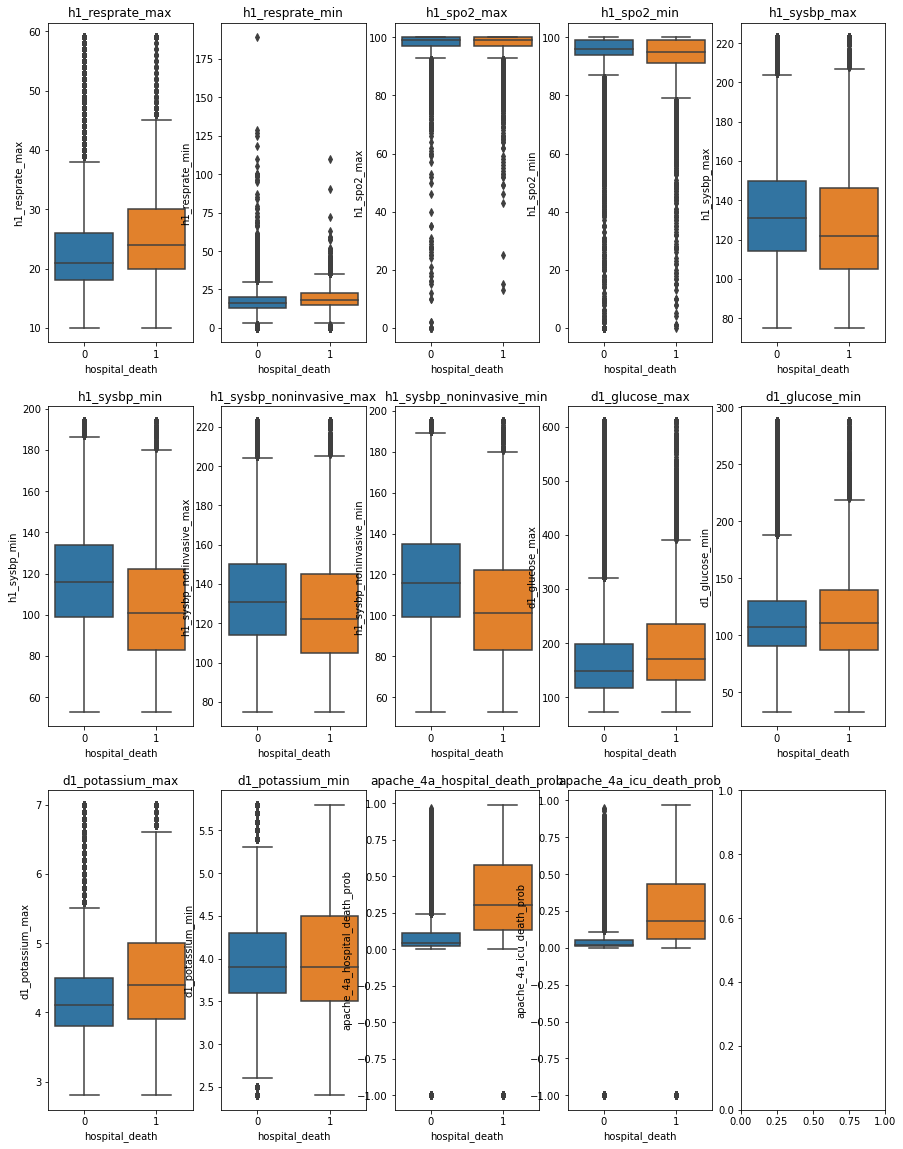

In [37]:
fig, axe = plt.subplots(3,5, figsize=(15,20))
for i in range(len(df_num4.columns)):
    nrow = i//5
    ncol = i%5
    ax = sns.boxplot(x = target, y = df_num4.columns[i], ax = axe[nrow,ncol], 
                       data = df_num4)
    ax.set_title(df_num4.columns[i])
plt.show()

**Observations**:
- La mediane **ne varie pas** en fonction de la target pour les features : **h1_resprate_min, h1_spo2_max, h1_spo2_min, d1_glucose_min, d1_potassium_min**
    - donc On **accepte l'hypothèse H0** (indépendance des variables)
- La mediane **varie** en fonction de la target  les autres features.
    - On **accepte l'hypothèse H1** (dépendance des variables)

**Conclusion** :
- On **supprime les variables** : **h1_resprate_min, h1_spo2_max, h1_spo2_min, d1_glucose_min, d1_potassium_min**

In [38]:
var_num_a_suppr = [ 'd1_diasbp_max', 'd1_diasbp_noninvasive_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_noninvasive_max',
                   'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 
                   'encounter_id', 'patient_id','hospital_id', 'icu_id', 'pre_icu_los_days', 'temp_apache',
                   'd1_sysbp_noninvasive_max', 'd1_temp_max',  'd1_temp_min',
                   'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'd1_glucose_min', 'd1_potassium_min']
print("Nombre de variable numérique a supprimer : ", len(var_num_a_suppr))

Nombre de variable numérique a supprimer :  23


In [39]:
var_num_a_garder = [col for col in var_num if col not in var_num_a_suppr]
print("Nombre de variable numérique a garder : ", len(var_num_a_garder))

Nombre de variable numérique a garder :  36


## 3.2 variable categorique vs categorique : Khi2


In [40]:
chi2_p = {}
for i in var_cat:
    if i != target.name:#pour ne pas faire de khi2 entre deux fois la target
        pval = khi2(pd.crosstab(df[i], target))[1] 
        chi2_p[i] = pval
#Tri des p values par ordre croissant :
sorted(chi2_p.items(), key=lambda x: x[1], reverse=False) #Trie les p_value de facon croissante

[('gcs_eyes_apache', 0.0),
 ('gcs_motor_apache', 0.0),
 ('gcs_verbal_apache', 0.0),
 ('intubated_apache', 0.0),
 ('ventilated_apache', 0.0),
 ('apache_3j_bodysystem', 3.218994073081e-311),
 ('icu_admit_source', 4.290475605964737e-243),
 ('apache_2_bodysystem', 4.606614108830863e-232),
 ('elective_surgery', 1.8111023373323387e-176),
 ('apache_post_operative', 1.6847425574384933e-141),
 ('gcs_unable_apache', 7.376504850847277e-54),
 ('solid_tumor_with_metastasis', 6.2833898797239615e-53),
 ('icu_type', 1.4519760772919953e-49),
 ('immunosuppression', 1.4194416123825635e-39),
 ('cirrhosis', 3.797509976832926e-32),
 ('hepatic_failure', 3.1299775372408446e-31),
 ('leukemia', 6.694526746083462e-19),
 ('arf_apache', 3.8338436661839975e-16),
 ('lymphoma', 3.1991719635845954e-08),
 ('diabetes_mellitus', 1.0412621006145534e-06),
 ('icu_stay_type', 3.6814347425011462e-06),
 ('ethnicity', 0.0035044761898043813),
 ('gender', 0.040293421082557034),
 ('aids', 0.2640925484452675)]

In [41]:
var_cat_a_garder = []
var_cat_a_suppr = []
for i in chi2_p:
    if chi2_p[i] <0.005:
        var_cat_a_garder.append(i)
    else:
        var_cat_a_suppr.append(i)

In [42]:
print("Nombre de variable numérique a supprimer : ", len(var_cat_a_suppr))
print("Nombre de variable numérique a garder : ", len(var_cat_a_garder))

Nombre de variable numérique a supprimer :  2
Nombre de variable numérique a garder :  22


In [43]:
var_a_garder = var_cat_a_garder + var_num_a_garder

In [44]:
df = df[var_a_garder]
df.head(3)

,elective_surgery,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,heart_rate_apache,map_apache,resprate_apache,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_mbp_min,d1_mbp_noninvasive_min,d1_resprate_max,d1_sysbp_min,d1_sysbp_noninvasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,0,Caucasian,Floor,admit,CTICU,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,68.0,22.73,180.3,73.9,113.0,502.01,118.0,40.0,36.0,37.0,37.0,119.0,46.0,46.0,34.0,73.0,73.0,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,131.0,115.0,131.0,115.0,168.0,4.0,0.10,0.05
1,0,Caucasian,Floor,admit,Med-Surg ICU,0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,77.0,27.42,160.0,70.2,108.0,203.01,120.0,46.0,33.0,31.0,31.0,118.0,38.0,38.0,32.0,67.0,67.0,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,95.0,71.0,95.0,71.0,145.0,4.2,0.47,0.29
2,0,Caucasian,Accident & Emergency,admit,Med-Surg ICU,0,0.0,3.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,25.0,31.95,172.7,95.3,122.0,703.03,102.0,68.0,37.0,48.0,48.0,96.0,68.0,68.0,21.0,105.0,105.0,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,148.0,124.0,148.0,124.0,150.0,4.2,0.00,0.00


# 4. Encodage des données:
- Rappel : 
    - variable categorique = variables ordinale, nominale et discrete :
    - on **encode** les **variables nominales et ordinales** (discrète sont déjà "encoder" car ce sont des valeurs numériques)

* Au sein même de la variables categoriques nous allons rescinder **en deux** afin séparer les variables **discretes** des variables **ordinal/nominales**
* Le but de cette opération est d'**anticiper l'étape d'encodage** car nous n'aurons pas besoin d'encoder les variables discrètes


In [45]:
df[var_cat_a_garder].head(1)

,elective_surgery,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,Caucasian,Floor,admit,CTICU,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular


In [46]:
df[var_cat_a_garder].dtypes

elective_surgery                 int64
ethnicity                       object
icu_admit_source                object
icu_stay_type                   object
icu_type                        object
apache_post_operative            int64
arf_apache                     float64
gcs_eyes_apache                float64
gcs_motor_apache               float64
gcs_unable_apache              float64
gcs_verbal_apache              float64
intubated_apache               float64
ventilated_apache              float64
cirrhosis                      float64
diabetes_mellitus              float64
hepatic_failure                float64
immunosuppression              float64
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
dtype: object

- On voit que les **variables ordinal/nominales** ont un **dtypes = object** 
- les variables **discrètes** ont un **dtypes = int64** ou **float64**


In [47]:
var_a_encoder = list(df[var_cat_a_garder].dtypes[df[var_cat_a_garder].dtypes == 'object'].index)
df[var_a_encoder].head(2)

,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,Floor,admit,Med-Surg ICU,Respiratory,Respiratory


In [48]:
#par elimination, les variables discretes sont toutes les variables categoriques - variable a encoder : 
var_discrete = [col for col in var_cat_a_garder if col not in var_a_encoder]
df[var_discrete].head(1)

,elective_surgery,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#Encodage : 
df[var_a_encoder] = OrdinalEncoder().fit_transform(df[var_a_encoder])

In [50]:
df.head(1)
#il n'y a plus de variable ordinal/nominales

,elective_surgery,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,heart_rate_apache,map_apache,resprate_apache,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_mbp_min,d1_mbp_noninvasive_min,d1_resprate_max,d1_sysbp_min,d1_sysbp_noninvasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,0,2.0,1.0,0.0,2.0,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,68.0,22.73,180.3,73.9,113.0,502.01,118.0,40.0,36.0,37.0,37.0,119.0,46.0,46.0,34.0,73.0,73.0,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,131.0,115.0,131.0,115.0,168.0,4.0,0.1,0.05


# 5. Normalisation des variables continues : 

In [51]:
df[var_num_a_garder] = (df[var_num_a_garder] - df[var_num_a_garder].mean())/df[var_num_a_garder].std()

In [52]:
#Données sont normalisés et encodés : 
df.head()

,elective_surgery,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,age,bmi,height,weight,apache_2_diagnosis,apache_3j_diagnosis,heart_rate_apache,map_apache,resprate_apache,d1_diasbp_min,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_mbp_min,d1_mbp_noninvasive_min,d1_resprate_max,d1_sysbp_min,d1_sysbp_noninvasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
0,0,2.0,1.0,0.0,2.0,0,0.0,3.0,6.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.347322,-7.951523e-01,0.994572,-4.110893e-01,-0.849112,-0.122061,0.595399,-1.148595,0.679070,-0.989134,-0.998052,0.727388,-1.204895,-1.215204,0.480224,-1.157901,-1.164804,-0.404620,0.012154,-0.432042,-0.010714,1.248738,1.221112,-0.276427,0.304178,-0.278589,0.293586,0.469044,-0.079922,-0.050362,-0.068150,-0.055820,-0.060371,-0.389735,0.069252,0.039076
1,0,2.0,1.0,0.0,5.0,0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,0.896642,-2.174928e-01,-0.899689,-5.612650e-01,-0.907751,-0.771386,0.660498,-1.005068,0.479128,-1.440072,-1.450347,0.681934,-1.715721,-1.728859,0.292978,-1.448317,-1.456222,-0.792555,-0.923127,-0.826796,-0.962850,1.016099,0.820532,-0.326401,-1.197726,-0.329835,-1.239802,1.150002,-1.412635,-1.743657,-1.423480,-1.778658,-0.333813,-0.073138,1.631583,1.193917
2,0,2.0,0.0,0.0,5.0,0,0.0,3.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,-2.277208,3.404597e-01,0.285391,4.574944e-01,-0.743562,0.314486,0.074606,-0.478803,0.745717,-0.162415,-0.168845,-0.318063,0.199875,0.197349,-0.736878,0.390983,0.389422,0.703767,-0.299606,0.695827,-0.328093,0.178602,-0.281062,-0.026555,0.196899,-0.022355,0.184058,-0.348107,0.549414,0.295993,0.571867,0.296579,-0.274369,-0.073138,-0.352999,-0.201516
3,1,2.0,2.0,0.0,2.0,1,0.0,4.0,6.0,0.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.140785,-8.062375e-01,-0.423791,-9.062632e-01,0.206389,1.406829,0.465201,-0.670172,-1.453647,-0.613352,-0.621140,0.591025,1.221527,1.224660,-0.549631,-0.625472,-0.630539,-0.737136,-1.172536,-0.093681,-0.074190,0.364712,0.620242,0.023420,-0.446774,-0.073602,-0.034997,-1.437641,0.105177,-0.396718,-0.105798,-0.055820,0.141738,1.193253,-0.184099,-0.057160
4,0,2.0,0.0,0.0,5.0,0,0.0,4.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,-2.643422,-1.023941e-13,1.713085,1.441976e-14,-0.778745,0.092933,-1.292476,0.358438,-0.653878,0.513992,0.509597,-0.636243,1.604646,1.609902,-1.017747,1.117023,1.117965,1.313380,0.323914,1.316155,0.306665,-0.147092,-0.381207,0.623112,0.679654,0.643851,0.676933,-0.211915,-0.116942,0.142057,-0.105798,0.139958,-0.274369,-0.073138,-0.141873,-0.105279


# 6. Fichier test 
- comme il n'y en a pas ici, nous n'avons pas besoin de faire cette étape.

# 7. Sauvegarde et exportation du dataframe :

In [53]:
#On oublie pas de remettre la target 
df = pd.concat([df,target],axis = 1)

In [54]:
df.shape

(91713, 59)

In [55]:
df.to_csv(path_or_buf='dataset_nettoyes.csv', index=0 )